## Introduction

This notebook explores the Adult Income dataset to understand patterns that might help predict an individual's income bracket (>50K or <=50K).

We seek to answer questions like:
- What demographic or occupational factors relate to higher income?
- Are certain education levels or occupations more common among higher earners?
- Is there any gender or age disparity?

The goal is to create a data story highlighting key insights from this dataset.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/rasheedmehrinfar/Desktop/springboard/DataScienceGuidedCapstone/misc Projects/Craft a Story from a Dataset/adult_income.csv')
# Preview the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [40]:
# General info about the dataset
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [62]:
# Replace '?' with NaN and drop rows with NaN values
df = df.replace(' ?', pd.NA)
df = df.dropna()
df.shape

(48842, 16)


## Exploratory Questions and Trends

### 1 What is the income distribution?


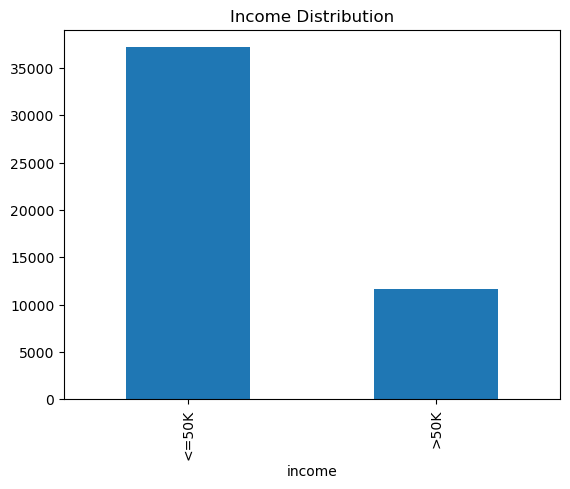

In [43]:
import matplotlib.pyplot as plt

# Plot income distribution
df['income'].value_counts().plot(kind='bar')
plt.title('Income Distribution')
plt.show()


### 2 How does income relate to education?


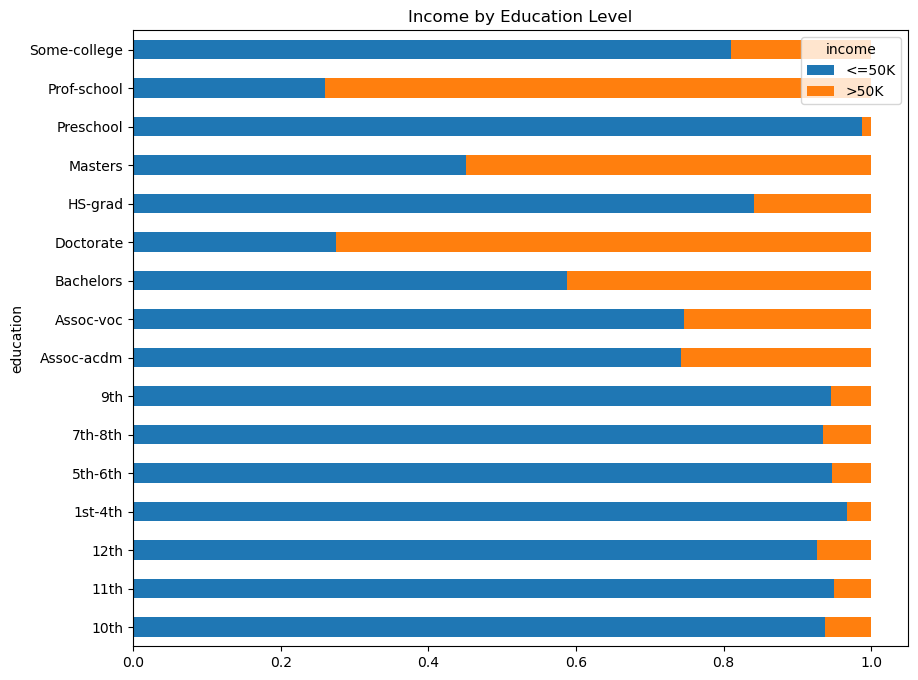

In [45]:
edu_dist = df.groupby('education')['income'].value_counts(normalize=True).unstack()
edu_dist.plot(kind='barh', stacked=True, figsize=(10,8))
plt.title('Income by Education Level')
plt.show()


### 3 Is there a gender disparity in income?


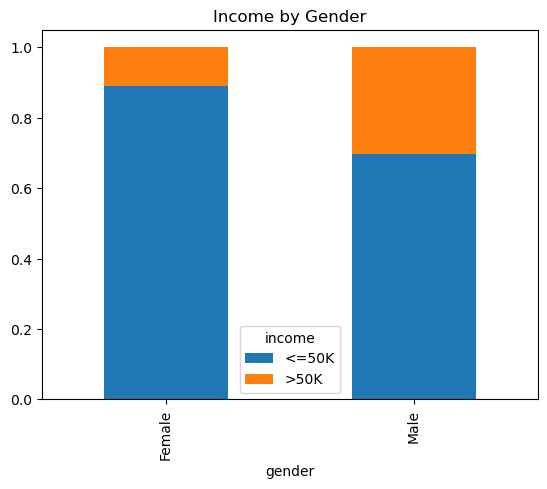

In [47]:
gender_dist = df.groupby('gender')['income'].value_counts(normalize=True).unstack()
gender_dist.plot(kind='bar', stacked=True)
plt.title('Income by Gender')
plt.show()


### 4 Age and income trends


/var/folders/ng/qvt3l7xx5dx_jqf8ks03krb40000gn/T/ipykernel_65027/4208354636.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_dist = df.groupby('age_group')['income'].value_counts(normalize=True).unstack()


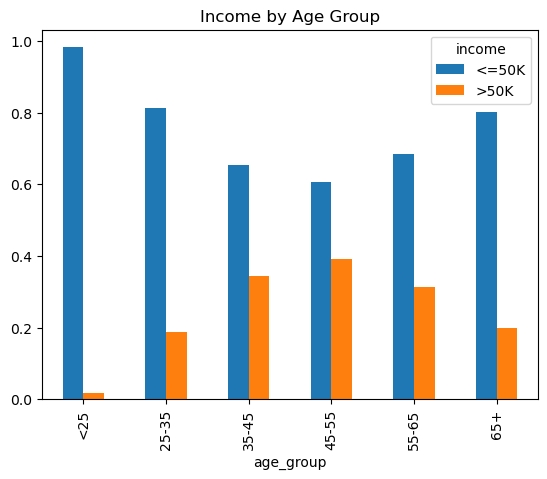

In [49]:
# Creating age groups
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['<25','25-35','35-45','45-55','55-65','65+'])

age_dist = df.groupby('age_group')['income'].value_counts(normalize=True).unstack()
age_dist.plot(kind='bar')
plt.title('Income by Age Group')
plt.show()


### 5 Occupation insights


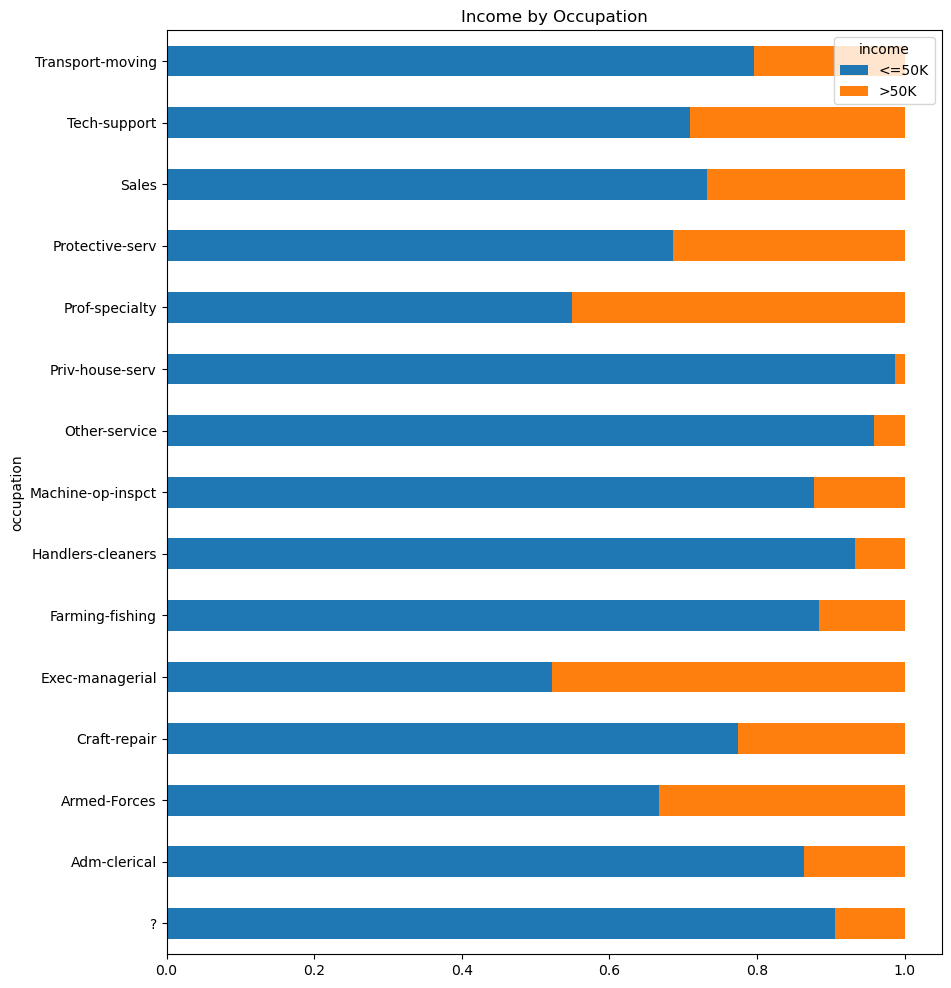

In [51]:
occ_dist = df.groupby('occupation')['income'].value_counts(normalize=True).unstack()
occ_dist.plot(kind='barh', stacked=True, figsize=(10,12))
plt.title('Income by Occupation')
plt.show()


## Hypotheses and Conclusions

**Hypotheses:**  
- Individuals with higher education, certain occupations, and in certain age groups are more likely to earn >50K.

**Key Findings:**  
- Strong link between education and income.  
- Certain occupations dominate higher income brackets.  
- Gender disparity in earnings.  
- Earnings trend higher with increasing age until a point.  



## Potential Next Steps

- Build predictive models to quantify these relationships.  
- Explore interaction of different variables (e.g., gender + occupation).  
- Analyze hours worked vs income bracket for more deeper look into the data.  